In [1]:
# %load firstcell.py
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['figure.dpi']=100
import statsmodels.api as sm

plt.rc('axes', labelsize=15);    # fontsize of the x and y labels

In [2]:
def margin_error(SE,significance=.95):
    from scipy.stats import norm
    margin_error= SE*norm.ppf(significance+(1-significance)/2)
    return margin_error

In [3]:
def Get_paramsDF(vscale,param,country,timeint=None,level=None):
    """param: "mu" or "sigma" (string)
    vscale: versus what scale: "spatial", "temporal" (string) 
    level:0,1,2,3,4,5,6,7,8,9 (geographical level of buffer)
    ngrams: 1,2,3,4,5
    timeint: 3,6,12,24,48,96"""
    
    dist4country = { "Mexico":np.arange(0,11), "United_Kingdom":np.arange(0,10),"Spain":np.arange(0,9),"India":np.arange(0,11),'Argentina':np.arange(0,11)}
    base=2
    distancias = np.power(base, dist4country[country]).astype(float)*3*1000

    inputpath = os.path.join('parametros_valores/1000ngrams/',country,'display_ngrams',f'{param}_vs_{vscale}')
    if vscale == "spatial":
        data = pd.read_csv( os.path.join(inputpath,f'{timeint}hrs'),index_col=0)
        se=pd.read_csv(os.path.join(inputpath,f'SE{timeint}hrs.csv'),index_col=0)
    else:
        data = pd.read_csv( os.path.join(inputpath,f'{distancias[level]/1000}Km'),index_col=0 )
        se=pd.read_csv(os.path.join(inputpath,'SE{}Km.csv'.format(distancias[level]/1000)),index_col=0)
            
    me=margin_error(se)
        
    return data,me

In [4]:
def plots_Wcis(vscale,country,param,timeint,ax=None):
    df = Get_paramsDF(vscale,param,country,timeint=timeint)
    se=pd.read_csv(f'parametros_valores/1000ngrams/{country}/display_ngrams/{param}_vs_{vscale}/SE{timeint}hrs.csv',index_col=0)
    me=margin_error(se,)
    
    dft=df.T
    dft['newindex']=(dft.index.values.astype('float')/1000).astype(int).astype(str)
    dft.set_index('newindex',inplace=True)

    dft.plot(marker='.',linestyle='none',yerr=me.values,capsize=5,figsize=(10.7,10),ax=ax,legend=False)
    
    ax.xaxis.label.set_visible(False)
    
    patches, labels = ax.get_legend_handles_labels()
    
    return patches,labels

Mexico
R2_model= 0.8183758625122706
Intercept          2.575206
ngram             -0.268555
log_distance_km   -0.122601
log_timeint        0.155588
dtype: float64
----------------
Pvalues:
Intercept          2.195339e-125
ngram              2.380848e-115
log_distance_km     2.826370e-24
log_timeint         4.016764e-13
dtype: float64
F-pvalue:
2.299360189766553e-120
----------------
R2_ngram= 0.7186381078826913
R2_dist= 0.06786105299029799
R2_time= 0.03187670163928136
R2_sum= 0.8183758625122707



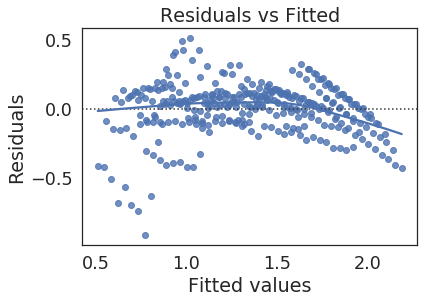

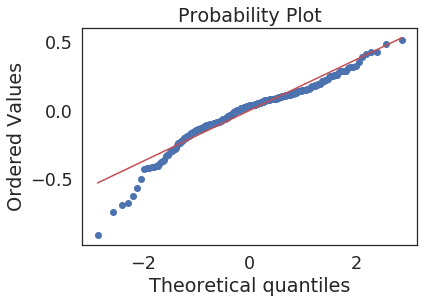

United_Kingdom
R2_model= 0.8649148415255312
Intercept          2.349291
ngram             -0.282909
log_distance_km   -0.016375
log_timeint       -0.014260
dtype: float64
----------------
Pvalues:
Intercept          3.232609e-119
ngram              1.304362e-130
log_distance_km     1.247775e-01
log_timeint         4.260521e-01
dtype: float64
F-pvalue:
2.737336473971229e-128
----------------
R2_ngram= 0.8635434380308793
R2_dist= 0.001081466546408838
R2_time= 0.00028993694824330785
R2_sum= 0.8649148415255314



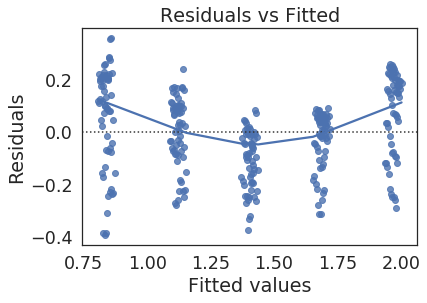

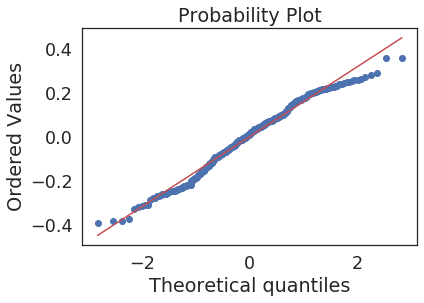

Spain
R2_model= 0.7464248909476019
Intercept          2.692387
ngram             -0.165036
log_distance_km   -0.154866
log_timeint        0.043480
dtype: float64
----------------
Pvalues:
Intercept          3.849769e-118
ngram               4.538761e-71
log_distance_km     1.757692e-29
log_timeint         1.834271e-02
dtype: float64
F-pvalue:
6.292532287280284e-79
----------------
R2_ngram= 0.5853587619228761
R2_dist= 0.15569684796454608
R2_time= 0.005369281060179754
R2_sum= 0.7464248909476019



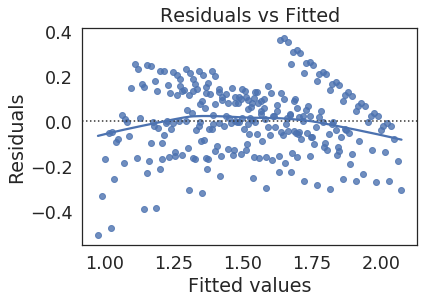

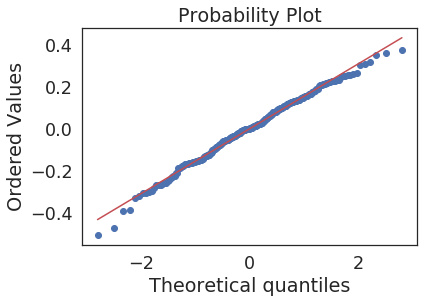

Argentina
R2_model= 0.8340188260960837
Intercept          2.679881
ngram             -0.250806
log_distance_km   -0.155459
log_timeint        0.159596
dtype: float64
----------------
Pvalues:
Intercept          2.573561e-140
ngram              2.835380e-117
log_distance_km     5.623637e-40
log_timeint         9.802217e-16
dtype: float64
F-pvalue:
9.772074042482493e-127
----------------
R2_ngram= 0.6793946057152035
R2_dist= 0.11826870423729696
R2_time= 0.03635551614358323
R2_sum= 0.8340188260960837



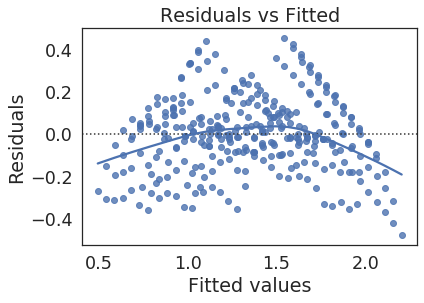

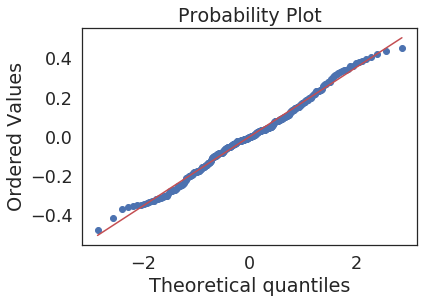

In [53]:
%matplotlib inline
from statsmodels.formula.api import ols
import scipy.stats as stats
countries_NDFS={}
for country in ['Mexico','United_Kingdom','Spain','Argentina']:

    dist4country = { "Mexico":np.arange(0,11), "United_Kingdom":np.arange(0,10),"Spain":np.arange(0,9),"India":np.arange(0,11),'Argentina':np.arange(0,11)}
    base=2
    distancias = np.power(base, dist4country[country]).astype(float)*3*1000

    levels=range(len(distancias))

    dfs=[]
    mes=[]
    for level in levels:
        df,me=Get_paramsDF('temporal','mu',country,level=level)
        df['level']=level
        me['level']=level
        dfs.append(df)
        mes.append(me)

    DF=pd.concat(dfs)
    ME=pd.concat(mes)

    DF=DF.reset_index()

    DF.rename(columns={'index':'ngram'},inplace=True)

    DF.head()

    ndfs=[]
    for index in DF.index:
        row=DF.loc[index]
        times=[]
        for x in [[i for i in filter(str.isdigit,time)] for time in list(row[1:-1].index)]:
            s=''
            for y in x:
                s+=y
            times.append(int(s))
        n=len(times)
        ndf={'ngram':[row[0]]*n,'level':[row[-1]]*n,'timeint':times,'mu':row.iloc[1:-1].values}
        ndfs.append(pd.DataFrame(ndf))
    NDFS=pd.concat(ndfs)

    country=country

    dist4country = { "Mexico":np.arange(0,11), "United_Kingdom":np.arange(0,10),"Spain":np.arange(0,9),"India":np.arange(0,11),'Argentina':np.arange(0,11)}
    base=2
    distancias = np.power(base, dist4country[country]).astype(float)*3*1000

    def app_dist(level):
        return distancias[level]

    _=list(NDFS['level'].values.astype('int'))
    NDFS['level']=list(map(app_dist,_))

    NDFS['level']=np.log10(NDFS['level'])
    NDFS['timeint']=np.log10(NDFS['timeint'])

    NDFS=NDFS.rename(columns={'level':'log_distance_km'})
    NDFS=NDFS.rename(columns={'timeint':'log_timeint'})

    NDFS.head()
    
    countries_NDFS[country]=NDFS

    def standarize(x):
        return (x-np.mean(x))/np.std(x)

#     NDFS['log_distance_km']=standarize(NDFS['log_distance_km'])
#     NDFS['timeint']=standarize(NDFS['timeint'])
#     NDFS['ngram']=standarize(NDFS['ngram'])

    mult_model=ols('mu~ngram+log_distance_km+log_timeint',data=NDFS).fit()
     
    print(country)
    print('R2_model=',mult_model.rsquared)
    print(mult_model.params)
    print('----------------')
    print('Pvalues:')
    print(mult_model.pvalues)
    print('F-pvalue:')
    print(mult_model.f_pvalue)
    print('----------------')
    rn=ols('mu~ngram',data=NDFS).fit().rsquared
    rd=ols('mu~log_distance_km',data=NDFS).fit().rsquared
    rt=ols('mu~log_timeint',data=NDFS).fit().rsquared

    print('R2_ngram=',rn);print('R2_dist=',rd);print('R2_time=',rt)
    print('R2_sum=',rn+rd+rt)
    print()
    
    y,yfit=NDFS['mu'],mult_model.fittedvalues
    resid=mult_model.resid
    
#     plt.plot(yfit,resid,linestyle='none',marker='o')

    ax = sns.residplot(yfit, resid,lowess=True)
    
    ax.set_title('Residuals vs Fitted')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')
    
    plt.show()
    
    stats.probplot(resid, dist="norm", plot=plt)
    plt.show()

In [43]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 35 + 15
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

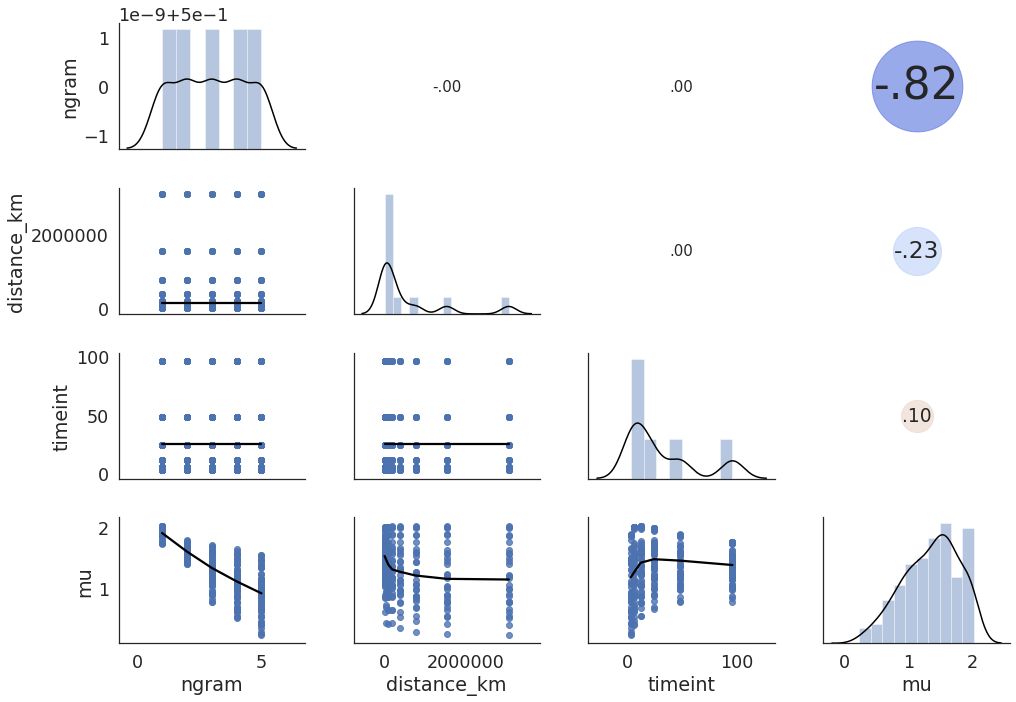

In [39]:
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(NDFS, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

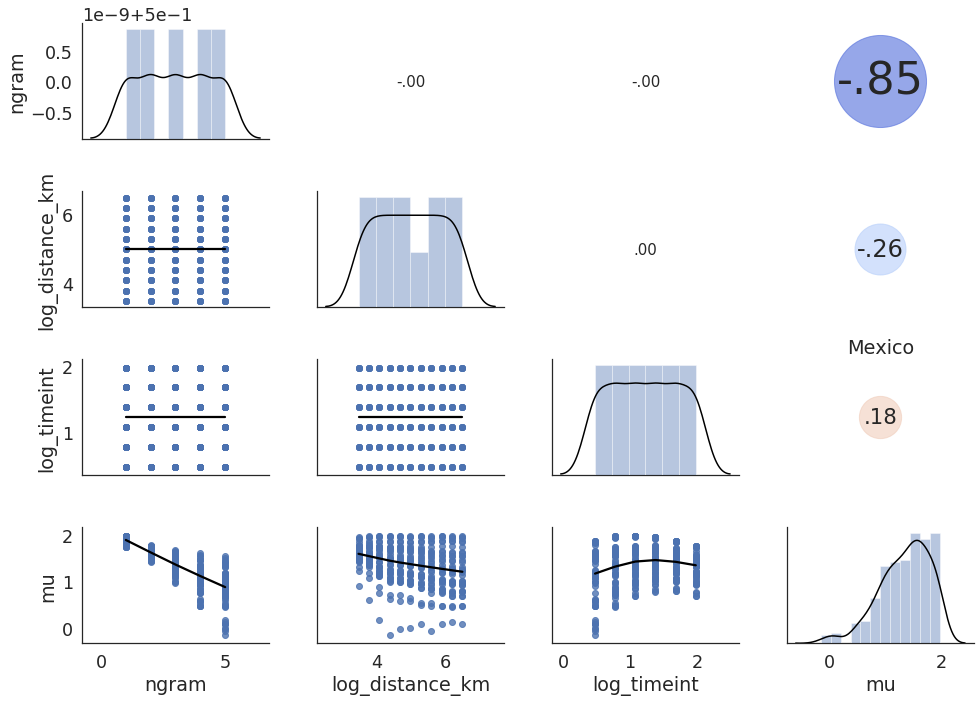

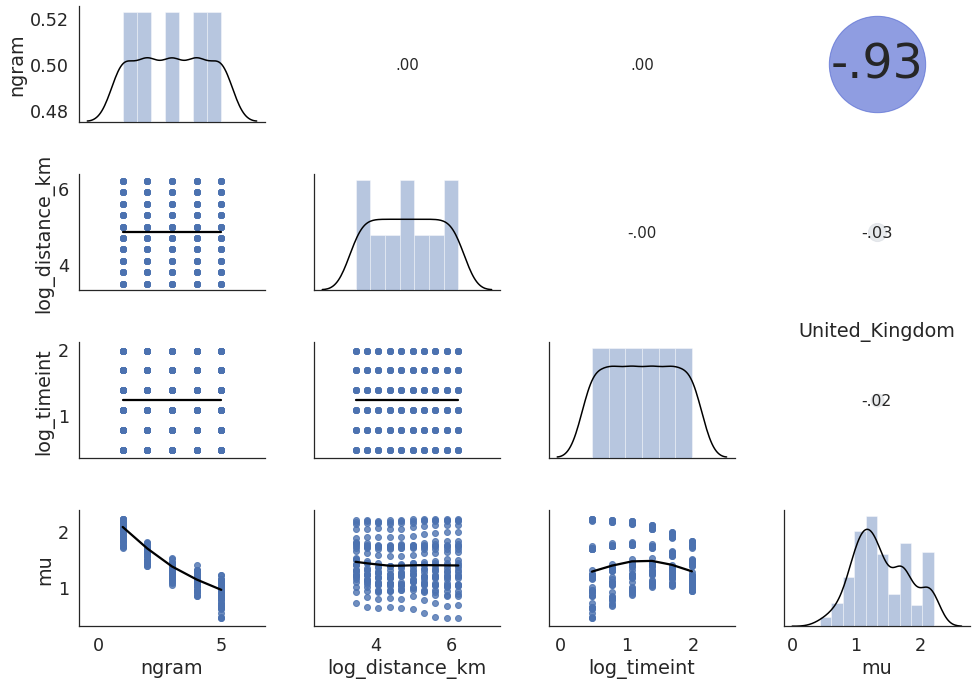

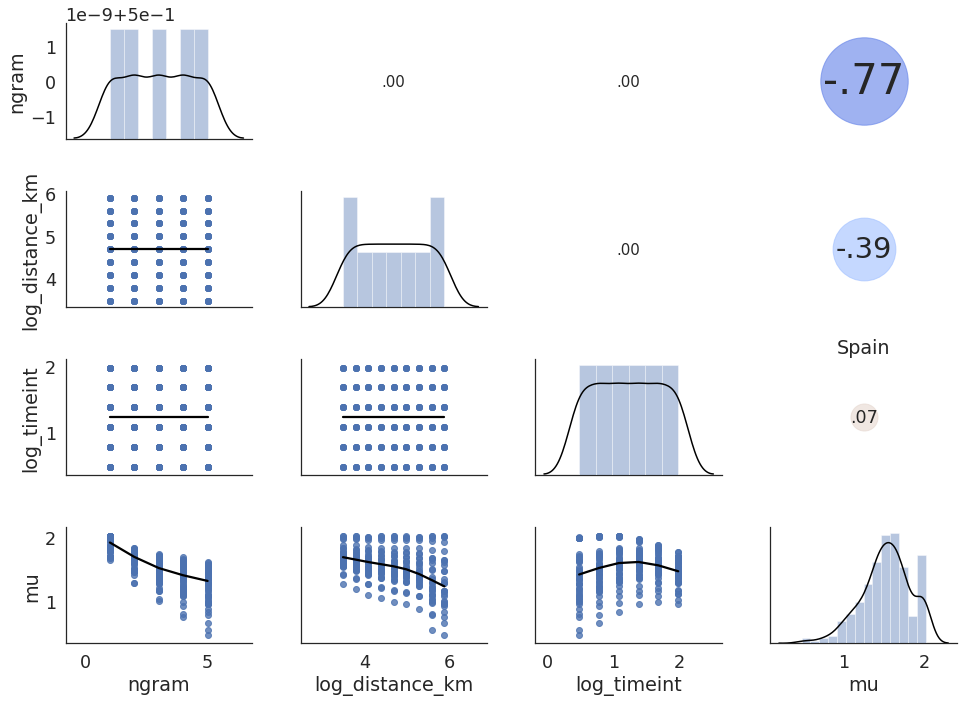

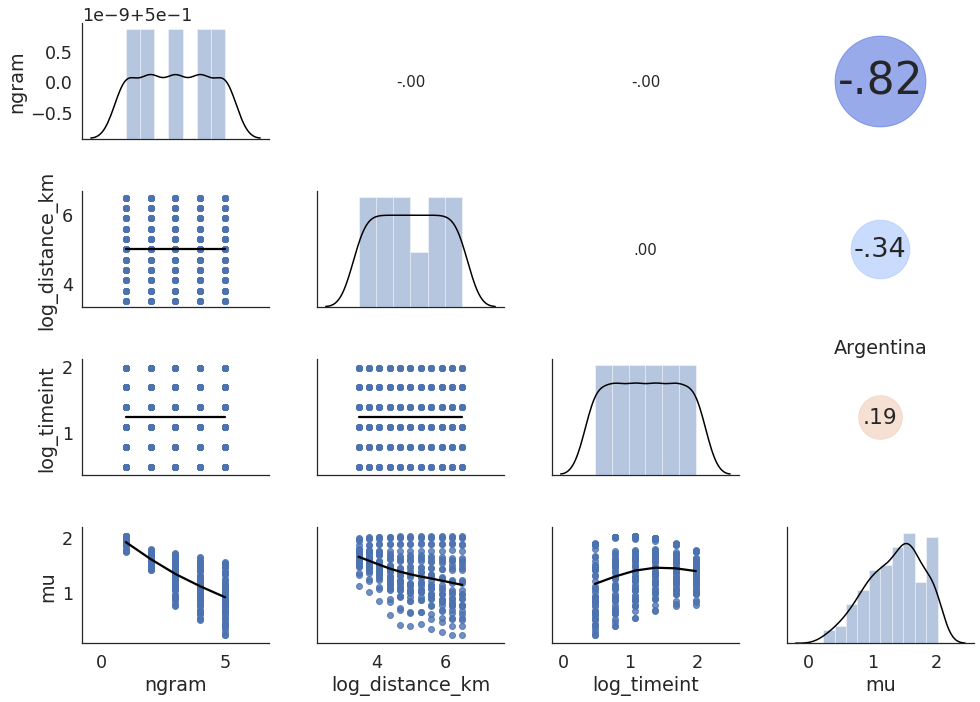

In [44]:
for country,NDFS in countries_NDFS.items():
    sns.set(style='white', font_scale=1.6)
    g = sns.PairGrid(NDFS, aspect=1.4, diag_sharey=False)
    g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
    g.map_diag(sns.distplot, kde_kws={'color': 'black'})
    g.map_upper(corrdot)1

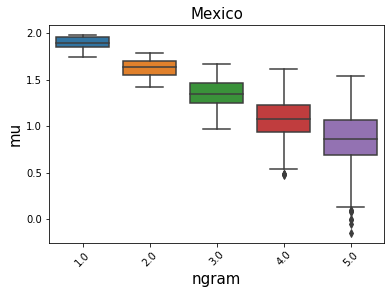

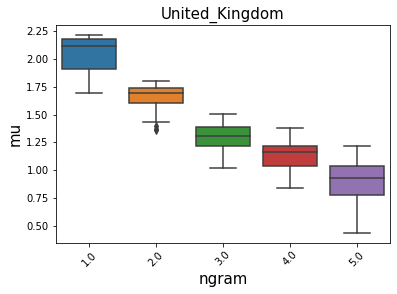

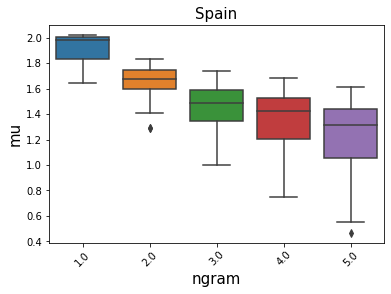

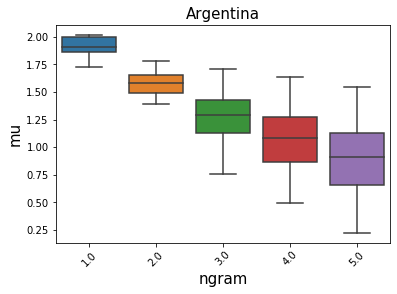

In [12]:
for country,NDFS in countries_NDFS.items():
    ax=sns.boxplot(x='ngram',y='mu',data=NDFS)
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.title(country,fontsize=15)
    plt.show()

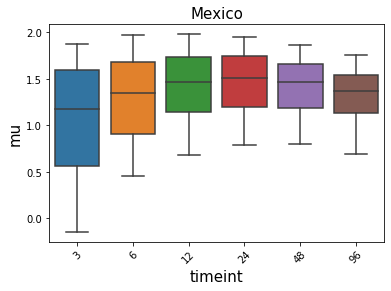

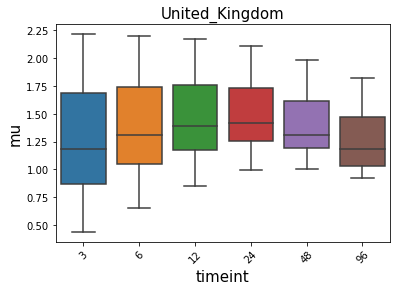

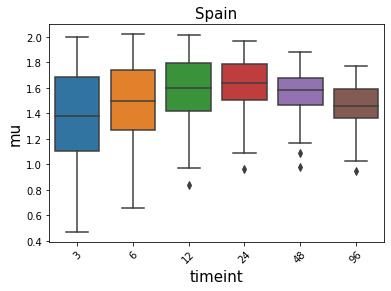

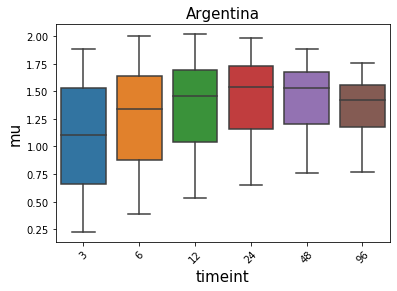

In [13]:
for country,NDFS in countries_NDFS.items():
    ax=sns.boxplot(x='timeint',y='mu',data=NDFS)
    plt.title(country,fontsize=15)
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.xticks(range(len(TIME)),TIME)
    plt.show()

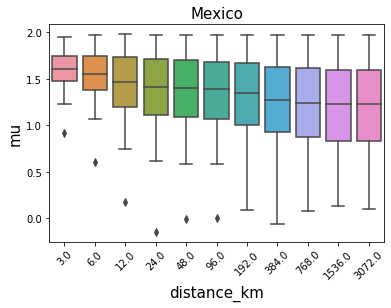

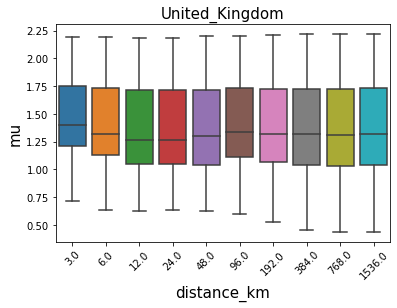

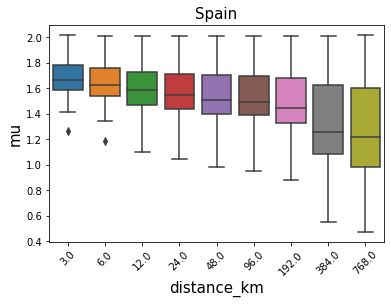

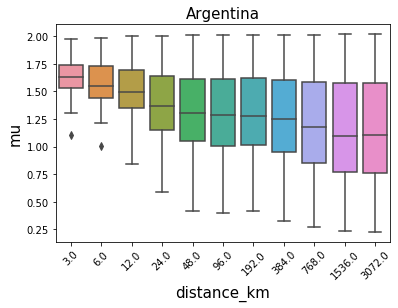

In [14]:
for country, NDFS in countries_NDFS.items():
    ax=sns.boxplot(x='log_distance_km',y='mu',data=NDFS)
    plt.title(country,fontsize=15)
    plt.setp(ax.get_xticklabels(), rotation=45)
    dist4country = { "Mexico":np.arange(0,11), "United_Kingdom":np.arange(0,10),"Spain":np.arange(0,9),"India":np.arange(0,11),'Argentina':np.arange(0,11)}
    base=2
    distancias = np.power(base, dist4country[country]).astype(float)*3*1000
    plt.xticks(range(len(distancias)),distancias/1000)
    plt.xlabel('distance_km')
    plt.show()

In [15]:
from dominance_analysis import Dominance_Datasets
from dominance_analysis import Dominance

country='Mexico'
NDFS=countries_NDFS[country]

print(country)
print('----------------------------------')
dominance_regression=Dominance(data=NDFS,target='mu',objective=1)
dominance_regression.incremental_rsquare()
dominance_regression.plot_incremental_rsquare()

Loading BokehJS ...

100%|██████████| 2/2 [00:00<00:00, 4639.72it/s]

Mexico
----------------------------------
Selecting 3 Best Predictors for the Model
Selected Predictors :  ['ngram', 'log_distance_km', 'timeint']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.8183758625122706

Selecting 3 Best Predictors for the Model
Selected Predictors :  ['ngram', 'log_distance_km', 'timeint']

Creating models for 7 possible combinations of 3 features :
#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################
#########################  Variable Dominance Calculation Done!!!!!  #########################



In [16]:
import plotly.express as px
df=dominance_regression.dominance_stats().reset_index()
fig = px.pie(df, values='Percentage Relative Importance', names='index', title='Mexico Percentage Relative Importance')
fig.show()

In [17]:
country='United_Kingdom'
NDFS=countries_NDFS[country]

print(country)
print('----------------------------------')
dominance_regression=Dominance(data=NDFS,target='mu',objective=1)
dominance_regression.incremental_rsquare()
dominance_regression.plot_incremental_rsquare()

100%|██████████| 2/2 [00:00<00:00, 7332.70it/s]

United_Kingdom
----------------------------------
Selecting 3 Best Predictors for the Model
Selected Predictors :  ['ngram', 'log_distance_km', 'timeint']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.8649148415255313

Selecting 3 Best Predictors for the Model
Selected Predictors :  ['ngram', 'log_distance_km', 'timeint']

Creating models for 7 possible combinations of 3 features :
#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################
#########################  Variable Dominance Calculation Done!!!!!  #########################



In [18]:
country='Spain'
NDFS=countries_NDFS[country]

print(country)
print('----------------------------------')
dominance_regression=Dominance(data=NDFS,target='mu',objective=1)
dominance_regression.incremental_rsquare()
dominance_regression.plot_incremental_rsquare()

100%|██████████| 2/2 [00:00<00:00, 3600.26it/s]

Spain
----------------------------------
Selecting 3 Best Predictors for the Model
Selected Predictors :  ['ngram', 'log_distance_km', 'timeint']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.7464248909476019

Selecting 3 Best Predictors for the Model
Selected Predictors :  ['ngram', 'log_distance_km', 'timeint']

Creating models for 7 possible combinations of 3 features :
#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################
#########################  Variable Dominance Calculation Done!!!!!  #########################



In [19]:
country='Argentina'
NDFS=countries_NDFS[country]

print(country)
print('----------------------------------')
dominance_regression=Dominance(data=NDFS,target='mu',objective=1)
dominance_regression.incremental_rsquare()
dominance_regression.plot_incremental_rsquare()

100%|██████████| 2/2 [00:00<00:00, 5353.29it/s]

Argentina
----------------------------------
Selecting 3 Best Predictors for the Model
Selected Predictors :  ['ngram', 'log_distance_km', 'timeint']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.8340188260960835

Selecting 3 Best Predictors for the Model
Selected Predictors :  ['ngram', 'log_distance_km', 'timeint']

Creating models for 7 possible combinations of 3 features :
#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################
#########################  Variable Dominance Calculation Done!!!!!  #########################

